#  <font color='red'>API | TWITTER</font>


In [ ]:
!pip install tweepy

In [24]:
import pandas as pd
import configparser
import tweepy

In [25]:
from configparser import ConfigParser
import glob

## <font color='grey'>Leyendo credenciales</font> 

In [3]:
# ESTE PASO HA REQUERIDO COPIAR LAS CREDENCIALES EN UN ARCHIVO .TXT Y CONVERTIRLO A .INI


config = configparser.ConfigParser()
config.read('Twitter.ini')

api_key = config['TWITTER']['API_KEY']
api_key_secret = config['TWITTER']['API_KEY_SECRET']

access_token = config['TWITTER']['ACCESS_TOKEN']
access_token_secret = config['TWITTER']['ACCESS_TOKEN_SECRET']


## <font color='grey'>Autenticación</font>

In [4]:
# AUTENTICACIÓN
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

# HACER UNA INSTANCIA API E INTRODUCIENDO AUTH (CREDENCIALES DE AUTENTICACIÓN) 

api = tweepy.API(auth)

##  <font color='grey'>Obteniendo las entradas públicas de mi feed</font>

In [20]:
# SE OBTIENEN LAS ÚLTIMAS 20 ENTRADAS PÚBLICAS DE MI FEED COMO STRING TIPO LISTA

public_tweets = api.home_timeline()

print(public_tweets)

[Status(_api=<tweepy.api.API object at 0x000001B345F17E50>, _json={'created_at': 'Sun Dec 04 11:08:13 +0000 2022', 'id': 1599359914865999873, 'id_str': '1599359914865999873', 'text': 'T-Ais, el nuevo tótem inteligente diseñado por Ineco para mejorar la autonomía del viajero con discapacidad https://t.co/h1qYmbgqHJ', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/h1qYmbgqHJ', 'expanded_url': 'http://ddsevilla.info/j1gfr1', 'display_url': 'ddsevilla.info/j1gfr1', 'indices': [108, 131]}]}, 'source': '<a href="http://besocy.com" rel="nofollow">Besocy_Oficial</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 34238668, 'id_str': '34238668', 'name': 'Diario de Sevilla', 'screen_name': 'diariosevilla', 'location': 'Sevilla, Spain', 'description': 'Diario de información general, Sevilla. Newspaper

In [21]:
# EJEMPLO PARA IMPRIMIR LA PRIMERA POSICIÓN EN LA LISTA, INDICADO CON [0]
print(public_tweets[0].text)

T-Ais, el nuevo tótem inteligente diseñado por Ineco para mejorar la autonomía del viajero con discapacidad https://t.co/h1qYmbgqHJ


In [22]:
# SE IMPRIME EN PANTALLA UN RESUMEN DEL TEXTO DE LOS 20 TWEETS,
    # FECHA DE CREACION, NOMBRE DE USUARIO, Y LOCALIZACIÓN DEL USUARIO

for tweet in public_tweets:
       print(tweet.text)
print(public_tweets[0].created_at)
print(public_tweets[0].user.screen_name)
print(public_tweets[0].text)
print(public_tweets[0].user.location)

T-Ais, el nuevo tótem inteligente diseñado por Ineco para mejorar la autonomía del viajero con discapacidad https://t.co/h1qYmbgqHJ
Instead of using raised textures to increase surface roughness like with previous World Cup balls, the Al Rihla is… https://t.co/B3MkjinMDC
@Juan_Castro_10 📌 "No sabemos cuántos siglos tengan que pasar para ver otro como él" - Higuita… https://t.co/PRvc6LnChg
El mercado de tarjetas gráficas vive su peor momento desde 2008. Malas noticias para las Radeon RX 7000 de AMD… https://t.co/Ri2RO4dIWe
RT @DominiqueHyde: Close to 880,000 people in Mauritania are acutely food insecure. 

Thanks to the national social protection programme, @…
La embarcación fue localizada por el ferry que une Málaga con Melilla y luego interceptada por la Guardia Civil… https://t.co/j7Vc2BEBKi
El cambio climático y las larvas de los corales en el Mediterráneo. El cambio climático global y, en particular, el… https://t.co/lLkLlk4F2j
@Juan_Castro_10 📌 "Hace 15 años que es el mejor, con 

In [23]:
# SE GUARDAN LOS ÚLTIMOS 20 TWEETS (LIMITACIÓN DE TWITTER PARA API) EN UN DATAFRAME
    # EL TWEET SE CONVIERTE EN FORMATO STRING PARA FACILITAR POSTERIOR ANÁLISIS

columns = ['Time', 'User', 'Location', 'Tweet']
data = []

for tweet in public_tweets:
     data.append([tweet.created_at, tweet.user.screen_name, tweet.user.location, tweet.text])

df = pd.DataFrame(data, columns= columns)
df
df.to_string('tweets.txt')

In [24]:
# SE MUESTRA INFORMACIÓN GENERAL DEL DF CON 20 TWEETS DE MI HOME TIMELINE 
df.describe()

C:\Users\jrver\AppData\Local\Temp\ipykernel_11652\126806916.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,Time,User,Location,Tweet
count,20,20,20,20
unique,19,17,13,20
top,2022-12-04 11:00:52+00:00,marca,España,"T-Ais, el nuevo tótem inteligente diseñado por..."
freq,2,3,4,1
first,2022-12-04 11:00:07+00:00,NaN,NaN,NaN
last,2022-12-04 11:08:13+00:00,NaN,NaN,NaN


In [25]:
# SE MUESTRA EL DF COMPLETO CON LA INFORMACIÓN
# AL ESTAR LIMITADO A 20 TWEETS, 
    # SE EXTRAE DE ESTE CONJUNTO, LOS 2 USUARIOS CON MAYOR Nº DE TWEETS Y 1 USUARIO CON EL MENOR Nº.
df

,Time,User,Location,Tweet
0,2022-12-04 11:08:13+00:00,diariosevilla,"Sevilla, Spain","T-Ais, el nuevo tótem inteligente diseñado por..."
1,2022-12-04 11:07:47+00:00,sciam,New York City,Instead of using raised textures to increase s...
2,2022-12-04 11:06:46+00:00,marca,España,"@Juan_Castro_10 📌 ""No sabemos cuántos siglos t..."
3,2022-12-04 11:06:36+00:00,xataka,España y Latinoamérica,El mercado de tarjetas gráficas vive su peor m...
4,2022-12-04 11:05:49+00:00,WFP,Worldwide,"RT @DominiqueHyde: Close to 880,000 people in ..."
5,2022-12-04 11:05:27+00:00,rtvenoticias,,La embarcación fue localizada por el ferry que...
6,2022-12-04 11:04:57+00:00,ecoticiasRED,España,El cambio climático y las larvas de los corale...
7,2022-12-04 11:04:56+00:00,marca,España,"@Juan_Castro_10 📌 ""Hace 15 años que es el mejo..."
8,2022-12-04 11:03:54+00:00,CNN,,The runoff for Georgia’s remaining US Senate s...
9,2022-12-04 11:03:24+00:00,marca,España,"@Juan_Castro_10 📌 ""Messi acaba de hacer la mej..."


In [26]:
# EXTRAYENDO 2 USUARIOS CON MAYOR Nº TWEETS Y 1 USUARIO CON MENOR Nº TWEETS
    
from collections import Counter

Users = df['User']
counter = Counter(Users)
first, second,*_, last = counter.most_common()

print(first, second, third)

('marca', 3) ('CNN', 2) ('ecoticiasRED', 1)


In [ ]:
# A CONTINUACIÓN, SE EXTRAEN LOS ÚLTIMOS 3250 TWEETS (MÁXIMO PERMITIDO POR TWITTER) PARA:
    # EL USUARIO MARCA Y EL USUARIO CNN.

In [ ]:
# CREANDO DF PARA MARCA Y GUARDADO EN .CSV
from tweepy import Cursor
columns = ['User','Time','Id','Text']
data = []

for tweet in tweepy.Cursor(api.user_timeline, screen_name = 'marca').items():
        data.append([tweet.user.screen_name, tweet.created_at, tweet.id, tweet.text])
            
df_1 = pd.DataFrame(data, columns= columns)
df_1



In [57]:
df_1.to_csv('tweets_marca.csv')

In [59]:
# CREANDO DF PARA CNN Y GUARDADO EN .CSV

columns = ['User','Time','Id','Text']
data = []

for tweet in tweepy.Cursor(api.user_timeline, screen_name = 'CNN').items():
        data.append([tweet.user.screen_name, tweet.created_at, tweet.id, tweet.text])
            
df_2 = pd.DataFrame(data, columns= columns)
df_2




,User,Time,Id,Text
0,CNN,2022-12-04 12:30:05+00:00,1599380518927319040,A former Iran national team football player ha...
1,CNN,2022-12-04 12:15:05+00:00,1599376745051848704,The University of Chicago’s Julianne Sitch mad...
2,CNN,2022-12-04 12:00:11+00:00,1599372995570663424,Those first images taken from the ground showe...
3,CNN,2022-12-04 11:45:04+00:00,1599369191446003712,"Just hours after giving birth, Brenda Gomez He..."
4,CNN,2022-12-04 11:30:09+00:00,1599365434536493058,South Korea recently broke its own record for ...
...,...,...,...,...
3245,CNN,2022-11-01 12:18:01+00:00,1587418682589855750,These are eight ways you can save money while ...
3246,CNN,2022-11-01 12:02:18+00:00,1587414728929943554,The Environmental Protection Agency has determ...
3247,CNN,2022-11-01 11:46:32+00:00,1587410758937223170,Here are 5⃣ things you need to know today 👇\n1...
3248,CNN,2022-11-01 11:35:25+00:00,1587407962703888384,CNN's @donlemon talks with Pennsylvania Lt. Go...


In [60]:
df_2.to_csv('tweets_cnn.csv')

## FORK

In [1]:
import numpy as np
import pandas as pd
import string
import re
import warnings
warnings.filterwarnings('ignore')

## <font color='grey'>Análisis exploratorio</font>

In [2]:
# LEYENDO CON PANDAS AMBOS .CSV CREADOS ANTERIORMENTE
tweets_cnn   = pd.read_csv("tweets_cnn.csv")
tweets_marca  = pd.read_csv("tweets_marca.csv")

# SE MUESTRA EL NÚMERO TOTAL DE TWEETS POR CADA USUARIO UTILIZANDO ATRIBUTO .SHAPE
print('tweets @marca: ', str(tweets_marca.shape[0]))
print('tweets @CNN: ', str(tweets_cnn.shape[0]))


tweets @marca:  3250
tweets @CNN:  3250


In [3]:
# SE UNEN LOS DOS DF EN UNO
tweets = pd.concat([tweets_cnn, tweets_marca], ignore_index=True)

# SE SELECCIONAN Y RENOMBRAN LAS COLUMNAS QUE INTERESAN
tweets = tweets[['User', 'Time','Id', 'Text']]
tweets.columns = ['autor', 'fecha', 'Id', 'texto']

# Parseo de fechas
#tweets['fecha'] = pd.to_datetime(tweets['fecha'])
tweets.head(3)


,autor,fecha,Id,texto
0,CNN,2022-12-04 12:30:05+00:00,1599380518927319040,A former Iran national team football player ha...
1,CNN,2022-12-04 12:15:05+00:00,1599376745051848704,The University of Chicago’s Julianne Sitch mad...
2,CNN,2022-12-04 12:00:11+00:00,1599372995570663424,Those first images taken from the ground showe...


In [20]:
tweets = tweets.assign(día=tweets['fecha'].str.split(expand=True)[0])

tweets

,autor,fecha,Id,texto,día
0,CNN,2022-12-04 12:30:05+00:00,1599380518927319040,A former Iran national team football player ha...,2022-12-04
1,CNN,2022-12-04 12:15:05+00:00,1599376745051848704,The University of Chicago’s Julianne Sitch mad...,2022-12-04
2,CNN,2022-12-04 12:00:11+00:00,1599372995570663424,Those first images taken from the ground showe...,2022-12-04
3,CNN,2022-12-04 11:45:04+00:00,1599369191446003712,"Just hours after giving birth, Brenda Gomez He...",2022-12-04
4,CNN,2022-12-04 11:30:09+00:00,1599365434536493058,South Korea recently broke its own record for ...,2022-12-04
...,...,...,...,...,...
6495,marca,2022-11-11 07:15:52+00:00,1590966521819529216,🇪🇸 ¡¡Día de la lista de España para el Mundial...,2022-11-11
6496,marca,2022-11-11 07:08:27+00:00,1590964654716723204,RT @MarcaGaming: ¿Quiénes son los 12 streamers...,2022-11-11
6497,marca,2022-11-11 07:00:01+00:00,1590962533128708097,#LaPortada Al Mundial con la Liga al rojo vivo...,2022-11-11
6498,marca,2022-11-11 01:43:27+00:00,1590882868716359680,#LoMásComentado Sin castigo para Ancelotti por...,2022-11-11


,autor,fecha,Id,texto,día
3250,marca,2022-12-04 12:24:44+00:00,1599379171662303232,🍊 El último baile de Van Gaal https://t.co/Fi7...,2022-12-04
3251,marca,2022-12-04 12:09:14+00:00,1599375271613943808,"💥 Cristiano Ronaldo exige a la Juventus 19,9 m...",2022-12-04
3252,marca,2022-12-04 11:53:33+00:00,1599371324123643906,Dictamen 'caso Ancelotti': enterrado\n\nHa pas...,2022-12-04
3253,marca,2022-12-04 11:43:14+00:00,1599368729921720321,RT @RadioMARCA: ¡Cómo se lo pasan nuestros piz...,2022-12-04
3254,marca,2022-12-04 11:38:25+00:00,1599367514986782720,😅 Están @JooAlmeida98 y @juann_ayuso... y tamb...,2022-12-04
...,...,...,...,...,...
6495,marca,2022-11-11 07:15:52+00:00,1590966521819529216,🇪🇸 ¡¡Día de la lista de España para el Mundial...,2022-11-11
6496,marca,2022-11-11 07:08:27+00:00,1590964654716723204,RT @MarcaGaming: ¿Quiénes son los 12 streamers...,2022-11-11
6497,marca,2022-11-11 07:00:01+00:00,1590962533128708097,#LaPortada Al Mundial con la Liga al rojo vivo...,2022-11-11
6498,marca,2022-11-11 01:43:27+00:00,1590882868716359680,#LoMásComentado Sin castigo para Ancelotti por...,2022-11-11


### <font color='grey'>Distribución temporal de tweets</font>

In [8]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as px
import datetime
#style.use('ggplot') or plt.style.use('ggplot')

In [53]:
# LIBRERIAS Y MÓDULOS PARA EL TEXT MINING DE TWEETS.
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


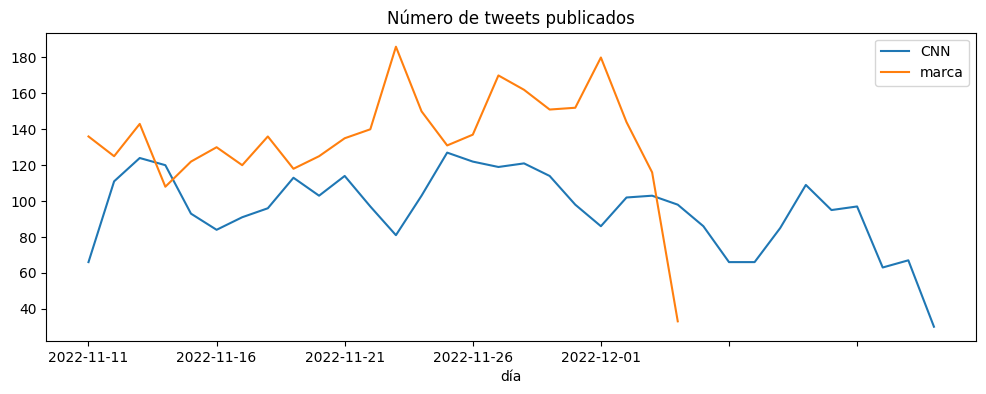

In [39]:
# DISTRIBUCIÓN TEMPORAL DE LOS TWEETS

fig, ax = plt.subplots(figsize=(12,4))

for autor in tweets.autor.unique():
    df_temp = tweets[tweets['autor'] == autor].copy()
    #df_temp['día'] = pd.to_datetime(df_temp['día'].dt.strftime('%Y-%m'))
    df_temp = df_temp.groupby(df_temp['día']).size()
    df_temp.plot(label=autor, ax=ax)

ax.set_title('Número de tweets publicados')
ax.legend();

In [41]:
# NOTA: DEBO REVISAR QUE ME ESTÁ DEVOLVIENDO LA GRÁFICA PARA 'marca'
    # PORQUE EN LA TABLA HAY DATOS PARA 'marca' HASTA 2022-12-04 al igual que para CNN
tweets.query("autor=='marca'")

,autor,fecha,Id,texto,día
3250,marca,2022-12-04 12:24:44+00:00,1599379171662303232,🍊 El último baile de Van Gaal https://t.co/Fi7...,2022-12-04
3251,marca,2022-12-04 12:09:14+00:00,1599375271613943808,"💥 Cristiano Ronaldo exige a la Juventus 19,9 m...",2022-12-04
3252,marca,2022-12-04 11:53:33+00:00,1599371324123643906,Dictamen 'caso Ancelotti': enterrado\n\nHa pas...,2022-12-04
3253,marca,2022-12-04 11:43:14+00:00,1599368729921720321,RT @RadioMARCA: ¡Cómo se lo pasan nuestros piz...,2022-12-04
3254,marca,2022-12-04 11:38:25+00:00,1599367514986782720,😅 Están @JooAlmeida98 y @juann_ayuso... y tamb...,2022-12-04
...,...,...,...,...,...
6495,marca,2022-11-11 07:15:52+00:00,1590966521819529216,🇪🇸 ¡¡Día de la lista de España para el Mundial...,2022-11-11
6496,marca,2022-11-11 07:08:27+00:00,1590964654716723204,RT @MarcaGaming: ¿Quiénes son los 12 streamers...,2022-11-11
6497,marca,2022-11-11 07:00:01+00:00,1590962533128708097,#LaPortada Al Mundial con la Liga al rojo vivo...,2022-11-11
6498,marca,2022-11-11 01:43:27+00:00,1590882868716359680,#LoMásComentado Sin castigo para Ancelotti por...,2022-11-11


In [ ]:
#.groupby("item", as_index=False).count()

# <font color='red'>WEBSCRAPING CON PANDAS</font> 

· A continuación se muestra el webscraping de una web inglesa de la que se extraen varios archivos .csv sobre partidos de futbol de la liga española desde 2016 hasta 2022.

· Una vez extraidos y transformados en un dataframe, se realiza análisis exploratorio de los datos con libería plotly.

· WEB https://www.football-data.co.uk/data.php

· Objetivo URL:

  Liga Española 1ª y 2ª
  
https://www.football-data.co.uk/mmz4281/2223/SP1.csv

https://www.football-data.co.uk/mmz4281/2223/SP2.csv

https://www.football-data.co.uk/mmz4281/2122/SP1.csv

https://www.football-data.co.uk/mmz4281/2122/SP2.csv   

https://www.football-data.co.uk/mmz4281/2021/SP1.csv

https://www.football-data.co.uk/mmz4281/2021/SP2.csv

https://www.football-data.co.uk/mmz4281/1920/SP1.csv

https://www.football-data.co.uk/mmz4281/1920/SP2.csv

  Bundesliga Alemana
  
https://www.football-data.co.uk/mmz4281/2223/D1.csv

https://www.football-data.co.uk/mmz4281/2122/D1.csv  

https://www.football-data.co.uk/mmz4281/1920/D1.csv

https://www.football-data.co.uk/mmz4281/1920/D1.csv

  Premier League Inglesa
  
https://www.football-data.co.uk/mmz4281/2223/E0.csv

https://www.football-data.co.uk/mmz4281/2122/E0.csv     

https://www.football-data.co.uk/mmz4281/2021/E0.csv

https://www.football-data.co.uk/mmz4281/1920/E0.csv

· Estructura del link: raiz + temporada + liga

    "https://www.football-data.co.uk/mmz4281/" + "2223" + "/" + "SP1" + ".csv"


## <font color='grey'>Asignar nombre de Liga por país a llaves (dict)</font>

In [1]:
import pandas as pd

In [2]:
# creación de un diccionario con el nombre orignal de la liga como llave

dict_paises = {'La Liga' : 'SP1', 'La Liga Segunda' : 'SP2', 
                'Bundesliga' : 'D1',
                'Premier League' : 'E0'
                 }


In [3]:
# comprobación del diccionario paises (Claves y valores)

print(dict_paises['La Liga'])
print('\n')

for liga in dict_paises:
    print(liga)
print('\n')

for liga in dict_paises:
    print(dict_paises[liga])

SP1


La Liga
La Liga Segunda
Bundesliga
Premier League


SP1
SP2
D1
E0


## <font color='grey'>[EXTRACT] Crear lista de dataframes de temporadas de Ligas por paises</font>

In [4]:
# creando una lista de ligas sobre el diccionario de paises
lista_ligas = []
raiz  = "https://www.football-data.co.uk/mmz4281/"

# Se hace un bucle for a un rango de temporadas e inserta una nueva columna
for liga in dict_paises:
    for temporada in range(16, 22):
        df = pd.read_csv(raiz + str(temporada) + str(temporada+1) + '/' + dict_paises[liga] + '.csv', encoding='unicode_escape')
        df.insert(1, 'temporada', temporada)
        lista_ligas.append(df)

## <font color='grey'>Almacenar DFs en un diccionario</font>

In [5]:
# Creando un nuevo diccionario donde guardar todos los dataframes
dic_historico = {}

# si colocamos lista_historico fuera del bucle, pd.concat creará una lista concatenada de todo las llaves del diccionario 
# si lista_historico la colocamos dentro del bucle, solo obtendremos una lista concatenada para las llaves concretas del diccionario.
    # asi cada liga será independiente y la informacion de liga anterior no se refleja
# con dic_historico quedará un registro de todas las ligas y así no se perderá la información.

for liga in dict_paises:
    lista_historico = []
    for temporada in range(19, 22):
        df = pd.read_csv( raiz + str(temporada) + str(temporada+1) + '/' + dict_paises[liga] + '.csv', encoding='unicode_escape')
        df.insert(1, 'temporada', temporada)
        lista_historico.append(df)
    df_concat = pd.concat(lista_historico)
    dic_historico[liga] = df_concat

In [6]:
# se muestran las llaves dentro de dic_historico
dic_historico.keys()

dict_keys(['La Liga', 'La Liga Segunda', 'Bundesliga', 'Premier League'])

In [7]:
dic_historico

{'La Liga':      Div  temporada        Date   Time    HomeTeam     AwayTeam  FTHG  FTAG  \
 0    SP1         19  16/08/2019  20:00  Ath Bilbao    Barcelona     1     0   
 1    SP1         19  17/08/2019  16:00       Celta  Real Madrid     1     3   
 2    SP1         19  17/08/2019  18:00    Valencia     Sociedad     1     1   
 3    SP1         19  17/08/2019  19:00    Mallorca        Eibar     2     1   
 4    SP1         19  17/08/2019  20:00     Leganes      Osasuna     0     1   
 ..   ...        ...         ...    ...         ...          ...   ...   ...   
 375  SP1         21  22/05/2022  19:00     Granada      Espanol     0     0   
 376  SP1         21  22/05/2022  19:00     Osasuna     Mallorca     0     2   
 377  SP1         21  22/05/2022  21:00   Barcelona   Villarreal     0     2   
 378  SP1         21  22/05/2022  21:00     Sevilla   Ath Bilbao     1     0   
 379  SP1         21  22/05/2022  21:00    Sociedad   Ath Madrid     1     2   
 
     FTR  HTHG  ...  AvgC<2

## <font color='grey'>Acceder a Dataframes</font>

In [8]:
# acceder a un dataframe concreto
dic_historico['La Liga']

,Div,temporada,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,SP1,19,16/08/2019,20:00,Ath Bilbao,Barcelona,1,0,H,0,...,1.97,0.75,1.93,2.00,1.91,2.01,2.02,2.03,1.91,1.98
1,SP1,19,17/08/2019,16:00,Celta,Real Madrid,1,3,A,0,...,2.63,1.00,1.82,1.97,1.85,2.07,2.00,2.20,1.82,2.06
2,SP1,19,17/08/2019,18:00,Valencia,Sociedad,1,1,D,0,...,1.82,-0.75,1.94,1.99,1.92,2.00,1.96,2.12,1.89,2.00
3,SP1,19,17/08/2019,19:00,Mallorca,Eibar,2,1,H,1,...,1.66,0.00,2.11,1.82,2.09,1.83,2.12,1.88,2.07,1.83
4,SP1,19,17/08/2019,20:00,Leganes,Osasuna,0,1,A,0,...,1.46,-0.50,1.89,2.04,1.90,2.01,1.95,2.06,1.90,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,21,22/05/2022,19:00,Granada,Espanol,0,0,D,0,...,2.29,-1.25,2.02,1.88,2.03,1.90,2.06,2.05,1.97,1.90
376,SP1,21,22/05/2022,19:00,Osasuna,Mallorca,0,2,A,0,...,1.76,0.25,1.68,2.15,1.74,2.23,1.86,2.29,1.77,2.11
377,SP1,21,22/05/2022,21:00,Barcelona,Villarreal,0,2,A,0,...,2.50,-0.50,2.07,1.83,2.08,1.85,2.09,2.00,1.97,1.91
378,SP1,21,22/05/2022,21:00,Sevilla,Ath Bilbao,1,0,H,0,...,1.69,0.00,2.01,1.89,2.02,1.90,2.07,2.06,2.00,1.88


## <font color='grey'>[TRANSFORM] Reajustar DFs</font>

VAMOS A COMPARAR LAS LIGAS DE 1ª DIVISIÓN DE CADA PAIS PARA PODER EXPLORAR LOS DATOS
PARA ELLO EXTRAEMOS LAS TABLAS DEL DICCIONARIO Y ASIGNAMOS NOMBRE DE AL DF

In [9]:
# definimos los dataframes a explorar
df_ES = dic_historico['La Liga']
df_EN = dic_historico['Premier League']
df_DE = dic_historico['Bundesliga']

# los unimos en un solo dataframe general

df_main = pd.concat([df_DE, df_EN, df_ES])

df_main

,Div,temporada,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Referee
0,D1,19,16/08/2019,19:30,Bayern Munich,Hertha,2,2,D,1,...,-2.25,2.03,1.90,1.99,1.93,2.04,1.93,1.98,1.91,NaN
1,D1,19,17/08/2019,14:30,Dortmund,Augsburg,5,1,H,1,...,-2.25,1.92,2.01,1.92,2.00,1.98,2.04,1.91,1.97,NaN
2,D1,19,17/08/2019,14:30,Freiburg,Mainz,3,0,H,0,...,0.00,1.92,2.01,1.94,1.97,1.97,2.06,1.90,1.99,NaN
3,D1,19,17/08/2019,14:30,Leverkusen,Paderborn,3,2,H,2,...,-2.00,2.07,1.86,2.05,1.86,2.15,1.91,2.03,1.85,NaN
4,D1,19,17/08/2019,14:30,Werder Bremen,Fortuna Dusseldorf,1,3,A,0,...,-0.75,1.92,2.01,1.92,2.00,1.95,2.11,1.89,2.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,21,22/05/2022,19:00,Granada,Espanol,0,0,D,0,...,-1.25,2.02,1.88,2.03,1.90,2.06,2.05,1.97,1.90,NaN
376,SP1,21,22/05/2022,19:00,Osasuna,Mallorca,0,2,A,0,...,0.25,1.68,2.15,1.74,2.23,1.86,2.29,1.77,2.11,NaN
377,SP1,21,22/05/2022,21:00,Barcelona,Villarreal,0,2,A,0,...,-0.50,2.07,1.83,2.08,1.85,2.09,2.00,1.97,1.91,NaN
378,SP1,21,22/05/2022,21:00,Sevilla,Ath Bilbao,1,0,H,0,...,0.00,2.01,1.89,2.02,1.90,2.07,2.06,2.00,1.88,NaN


In [10]:
print(df_main.columns)
print('\n')
print(df_main['Div'].unique())


Index(['Div', 'temporada', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR', 'HTHG',
       ...
       'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH', 'MaxCAHA',
       'AvgCAHH', 'AvgCAHA', 'Referee'],
      dtype='object', length=107)


['D1' 'E0' 'SP1']


In [11]:
df_main.dtypes

Div           object
temporada      int64
Date          object
Time          object
HomeTeam      object
              ...   
MaxCAHH      float64
MaxCAHA      float64
AvgCAHH      float64
AvgCAHA      float64
Referee       object
Length: 107, dtype: object

In [12]:
df_main.isnull().sum().sort_values(ascending=False)

Referee    2058
IWCH         16
IWCD         16
IWCA         16
P<2.5        14
           ... 
IWH           0
BWA           0
BWD           0
BWH           0
Max<2.5       0
Length: 107, dtype: int64

In [13]:
df_main

,Div,temporada,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Referee
0,D1,19,16/08/2019,19:30,Bayern Munich,Hertha,2,2,D,1,...,-2.25,2.03,1.90,1.99,1.93,2.04,1.93,1.98,1.91,NaN
1,D1,19,17/08/2019,14:30,Dortmund,Augsburg,5,1,H,1,...,-2.25,1.92,2.01,1.92,2.00,1.98,2.04,1.91,1.97,NaN
2,D1,19,17/08/2019,14:30,Freiburg,Mainz,3,0,H,0,...,0.00,1.92,2.01,1.94,1.97,1.97,2.06,1.90,1.99,NaN
3,D1,19,17/08/2019,14:30,Leverkusen,Paderborn,3,2,H,2,...,-2.00,2.07,1.86,2.05,1.86,2.15,1.91,2.03,1.85,NaN
4,D1,19,17/08/2019,14:30,Werder Bremen,Fortuna Dusseldorf,1,3,A,0,...,-0.75,1.92,2.01,1.92,2.00,1.95,2.11,1.89,2.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,21,22/05/2022,19:00,Granada,Espanol,0,0,D,0,...,-1.25,2.02,1.88,2.03,1.90,2.06,2.05,1.97,1.90,NaN
376,SP1,21,22/05/2022,19:00,Osasuna,Mallorca,0,2,A,0,...,0.25,1.68,2.15,1.74,2.23,1.86,2.29,1.77,2.11,NaN
377,SP1,21,22/05/2022,21:00,Barcelona,Villarreal,0,2,A,0,...,-0.50,2.07,1.83,2.08,1.85,2.09,2.00,1.97,1.91,NaN
378,SP1,21,22/05/2022,21:00,Sevilla,Ath Bilbao,1,0,H,0,...,0.00,2.01,1.89,2.02,1.90,2.07,2.06,2.00,1.88,NaN


In [14]:
# Cambiamos nombre de columnas abreviadas por nombres mas intruitivos
df_main.rename(columns={'temporada':'Temporada','Date':'Fecha',
                                'Time':'Hora','HomeTeam':'Local',
                                'AwayTeam':'Visitante','FTHG':'goles_local',
                                'FTAG':'goles_visitante',
                                'HY':'Amarillas_local','AY':'Amarillas_Visitante',
                                'HR':'Rojas_Local','AR':'Rojas_Visitante'}, inplace=True)

# seleccionamos solo las columnas que nos interesan
df_main = df_main[['Div','Temporada','Fecha','Hora','Local',
                   'Visitante','goles_local','goles_visitante',
                   'Amarillas_local','Amarillas_Visitante','Rojas_Local',
                   'Rojas_Visitante']]

df_main.insert(2, 'Timestamp',df_main.Fecha.str.cat(df_main.Hora, sep=' '))
#df_main.insert(2, 'Año',df_main.Fecha.str.cat(df_main.Hora, sep=' '))
#df['Year'] = df['Joined date'].dt.year 
#df_main['Timestamp'] = pd.to_datetime(df_main['Timestamp'], format='%d/%y/%m/%s', utc=True).astype()
df_main
          

,Div,Temporada,Timestamp,Fecha,Hora,Local,Visitante,goles_local,goles_visitante,Amarillas_local,Amarillas_Visitante,Rojas_Local,Rojas_Visitante
0,D1,19,16/08/2019 19:30,16/08/2019,19:30,Bayern Munich,Hertha,2,2,3,3,0,0
1,D1,19,17/08/2019 14:30,17/08/2019,14:30,Dortmund,Augsburg,5,1,0,0,0,0
2,D1,19,17/08/2019 14:30,17/08/2019,14:30,Freiburg,Mainz,3,0,1,3,0,0
3,D1,19,17/08/2019 14:30,17/08/2019,14:30,Leverkusen,Paderborn,3,2,2,0,0,0
4,D1,19,17/08/2019 14:30,17/08/2019,14:30,Werder Bremen,Fortuna Dusseldorf,1,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,21,22/05/2022 19:00,22/05/2022,19:00,Granada,Espanol,0,0,1,0,0,0
376,SP1,21,22/05/2022 19:00,22/05/2022,19:00,Osasuna,Mallorca,0,2,2,2,0,0
377,SP1,21,22/05/2022 21:00,22/05/2022,21:00,Barcelona,Villarreal,0,2,3,1,0,0
378,SP1,21,22/05/2022 21:00,22/05/2022,21:00,Sevilla,Ath Bilbao,1,0,3,3,0,0


In [15]:
df_main.dtypes



Div                    object
Temporada               int64
Timestamp              object
Fecha                  object
Hora                   object
Local                  object
Visitante              object
goles_local             int64
goles_visitante         int64
Amarillas_local         int64
Amarillas_Visitante     int64
Rojas_Local             int64
Rojas_Visitante         int64
dtype: object

In [16]:
from datetime import datetime
df_main['Timestamp'] = pd.DatetimeIndex(df_main['Timestamp'])
df_main['Fecha'] = pd.DatetimeIndex(df_main['Fecha'])
df_main['Hora'] = pd.DatetimeIndex(df_main['Hora']).time

df_main.dtypes

C:\Users\jrver\AppData\Local\Temp\ipykernel_21912\2476009433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['Timestamp'] = pd.DatetimeIndex(df_main['Timestamp'])
C:\Users\jrver\AppData\Local\Temp\ipykernel_21912\2476009433.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_main['Fecha'] = pd.DatetimeIndex(df_main['Fecha'])
C:\Users\jrver\AppData\Local\Temp\ipykernel_21912\2476009433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Div                            object
Temporada                       int64
Timestamp              datetime64[ns]
Fecha                  datetime64[ns]
Hora                           object
Local                          object
Visitante                      object
goles_local                     int64
goles_visitante                 int64
Amarillas_local                 int64
Amarillas_Visitante             int64
Rojas_Local                     int64
Rojas_Visitante                 int64
dtype: object

In [17]:
df_main

,Div,Temporada,Timestamp,Fecha,Hora,Local,Visitante,goles_local,goles_visitante,Amarillas_local,Amarillas_Visitante,Rojas_Local,Rojas_Visitante
0,D1,19,2019-08-16 19:30:00,2019-08-16,19:30:00,Bayern Munich,Hertha,2,2,3,3,0,0
1,D1,19,2019-08-17 14:30:00,2019-08-17,14:30:00,Dortmund,Augsburg,5,1,0,0,0,0
2,D1,19,2019-08-17 14:30:00,2019-08-17,14:30:00,Freiburg,Mainz,3,0,1,3,0,0
3,D1,19,2019-08-17 14:30:00,2019-08-17,14:30:00,Leverkusen,Paderborn,3,2,2,0,0,0
4,D1,19,2019-08-17 14:30:00,2019-08-17,14:30:00,Werder Bremen,Fortuna Dusseldorf,1,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,SP1,21,2022-05-22 19:00:00,2022-05-22,19:00:00,Granada,Espanol,0,0,1,0,0,0
376,SP1,21,2022-05-22 19:00:00,2022-05-22,19:00:00,Osasuna,Mallorca,0,2,2,2,0,0
377,SP1,21,2022-05-22 21:00:00,2022-05-22,21:00:00,Barcelona,Villarreal,0,2,3,1,0,0
378,SP1,21,2022-05-22 21:00:00,2022-05-22,21:00:00,Sevilla,Ath Bilbao,1,0,3,3,0,0


## <font color='grey'>[ANALYZE] Analizar Datos</font>

In [18]:
import pandas as pd
import numpy as np
import cufflinks as cf
from IPython.display import display,HTML

In [20]:
cf.set_config_file(sharing='public', theme='henanigans', offline=True)

### <font color='grey'>ANÁLISIS SESGADO</font>


* top 3 equipo mas goleador de cada liga
* top 3 equipo con mas tarjetas rojas de cada liga
* Evolución de los goles por año total y por cada liga
----


In [21]:
# CREO UNA COPIA DEL DATAFRAME ORIGINAL PARA ESTABLECER UN SAVE POINT
    # ASÍ EVITO TENER QUE CORRER TODO EL CÓDIGO ANTERIOR EN CASO DE EQUIVOCARME.
    
df_raw = df_main.copy(deep=True)


#### <font color='grey'>TOP 3 EQUIPOS MAS GOLEADORES DE CADA LIGA</font>

In [22]:
import pandas as pd

In [273]:
# DEFINIR EL NUEVO DATAFRAME ACOTADO A LO QUE QUIERO OBTENER
df_goleador = pd.DataFrame(df_raw[['Div','Fecha','Local',
                   'Visitante','goles_local','goles_visitante']])
df_goleador['Fecha'] = pd.DatetimeIndex(df_raw['Fecha']).year
df_goleador['Fecha'].astype(int)


df_goleador['SUMA'] = df_goleador['goles_local'] + df_goleador['goles_visitante']

In [274]:
df_goleador

,Div,Fecha,Local,Visitante,goles_local,goles_visitante,SUMA
0,D1,2019,Bayern Munich,Hertha,2,2,4
1,D1,2019,Dortmund,Augsburg,5,1,6
2,D1,2019,Freiburg,Mainz,3,0,3
3,D1,2019,Leverkusen,Paderborn,3,2,5
4,D1,2019,Werder Bremen,Fortuna Dusseldorf,1,3,4
...,...,...,...,...,...,...,...
375,SP1,2022,Granada,Espanol,0,0,0
376,SP1,2022,Osasuna,Mallorca,0,2,2
377,SP1,2022,Barcelona,Villarreal,0,2,2
378,SP1,2022,Sevilla,Ath Bilbao,1,0,1


In [275]:
df_goleador[['goles_local', 'goles_visitante']].groupby(df_goleador['Div'], as_index=False).agg('sum')

,goles_local,goles_visitante
0,1560,1304
1,1665,1464
2,1606,1240


In [ ]:
#apple_df.iplot(y=["Open", "High", "Low", "Close"],width=2.0,xTitle="Date", yTitle="Price ($)", title="OHLC Price From Apr,2019 - Mar,2020")

In [ ]:
# df_goleador.set_index('Div', inplace=True)
# df. loc [df [' col1 '] == algún_valor , ' col2 ']. suma ()
# df_goleador[['Div','Fecha','Local','goles_local']].nlargest(5,['goles_local'])

In [276]:
df_goleador[['Div','Fecha','Local','goles_local']]



,Div,Fecha,Local,goles_local
0,D1,2019,Bayern Munich,2
1,D1,2019,Dortmund,5
2,D1,2019,Freiburg,3
3,D1,2019,Leverkusen,3
4,D1,2019,Werder Bremen,1
...,...,...,...,...
375,SP1,2022,Granada,0
376,SP1,2022,Osasuna,0
377,SP1,2022,Barcelona,0
378,SP1,2022,Sevilla,1


In [277]:
# SACO LOS 5 EQUIPOS QUE MAS GOLES HAN MARCADO SIENDO VISITANTE
df_visitante = df_goleador[['Div','Fecha','Visitante','goles_visitante']]
df_visitante = df_visitante.replace('D1','Alemania')
df_visitante = df_visitante.replace('SP1','España')
df_visitante = df_visitante.replace('E0','Inglaterra')
df_visitante = df_visitante.fillna(0)

#df_visitante = df_visitante.pivot_table(index="Visitante", columns=("Div"),values="goles_visitante",aggfunc="sum").T


#df_visitante = df_visitante.fillna(0)
#df_visitante.sort_values('goles_visitante', ascending=False)
#df_visitante.set_index('Fecha', inplace=True)




In [278]:
df_visitante

,Div,Fecha,Visitante,goles_visitante
0,Alemania,2019,Hertha,2
1,Alemania,2019,Augsburg,1
2,Alemania,2019,Mainz,0
3,Alemania,2019,Paderborn,2
4,Alemania,2019,Fortuna Dusseldorf,3
...,...,...,...,...
375,España,2022,Espanol,0
376,España,2022,Mallorca,2
377,España,2022,Villarreal,2
378,España,2022,Ath Bilbao,0


In [281]:
df_visitante[['Div','Visitante']].nlargest(5,[df_visitante['goles_visitante']])

KeyError: "None of [Int64Index([2, 1, 0, 2, 3, 1, 0, 0, 4, 3,\n            ...\n            0, 4, 0, 1, 1, 0, 2, 2, 0, 2],\n           dtype='int64', length=3198)] are in the [columns]"

In [263]:
df_visitante

Visitante,Alaves,Arsenal,Aston Villa,Ath Bilbao,Ath Madrid,Augsburg,Barcelona,Bayern Munich,Betis,Bielefeld,...,Valencia,Valladolid,Vallecano,Villarreal,Watford,Werder Bremen,West Brom,West Ham,Wolfsburg,Wolves
Div,,,,,,,,,,,,,,,,,,,,,
Alemania,0.0,0.0,0.0,0.0,0.0,46.0,0.0,131.0,0.0,25.0,...,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,76.0,0.0
España,43.0,0.0,0.0,51.0,81.0,0.0,106.0,0.0,65.0,0.0,...,55.0,29.0,13.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0
Inglaterra,0.0,77.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,31.0,0.0,20.0,76.0,0.0,57.0


In [218]:
# barchart 
    # doble click sobre un club en la leyenda para aislar su resultado

df_visitante.iplot(kind='bar',barmode='stack', title='Goles Totales como Visitante 2019-2022 por clubes y Pais')

In [52]:
# INTENTANDO UN BUCLE... PARA OBTENER DF CON INDEX TIPO DE LIGA, 
    # Y COLUMNAS[NOMBRE DEL EQUIPO, TOTAL DE GOLES] PARA LOS 4 ULTIMOS AÑOS...

equipos = []
goles_equipo = []
for equipo in df_goleador['Local']:
        goles_equipo = df_goleador['goles_local'] + df_goleador['goles_visitante']
        equipos.append(equipo in ('Local'))
        goles_equipo.append(goles_equipo)
    
df_equipo = pd.DataFrame({'Equipo': equipos, 'total_goles': goles_equipo,})
df_equipo



NameError: name 'df_goleador' is not defined

In [29]:
#df_goleador.iplot(kind='hist')

In [30]:
# df_goleador.iplot(kind='bar',barmode='stack', title='Survival by the Sex')

In [162]:
#df_visitante.iplot(kind="scatter", theme="white",x="goles_visitante",y="Fecha",categories="Div")

In [27]:
#df_goleador.groupby(['Local','Div']).size().reset_index(name='goles_local').sort_values('goles_local', ascending=False)

In [28]:
#df_goleador.groupby(['Local','Div']).size().reset_index(name='goles_visitante').sort_values('goles_visitante', ascending=False)